<a href="https://colab.research.google.com/github/vvrgit/ML-Optimization/blob/main/NAG_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

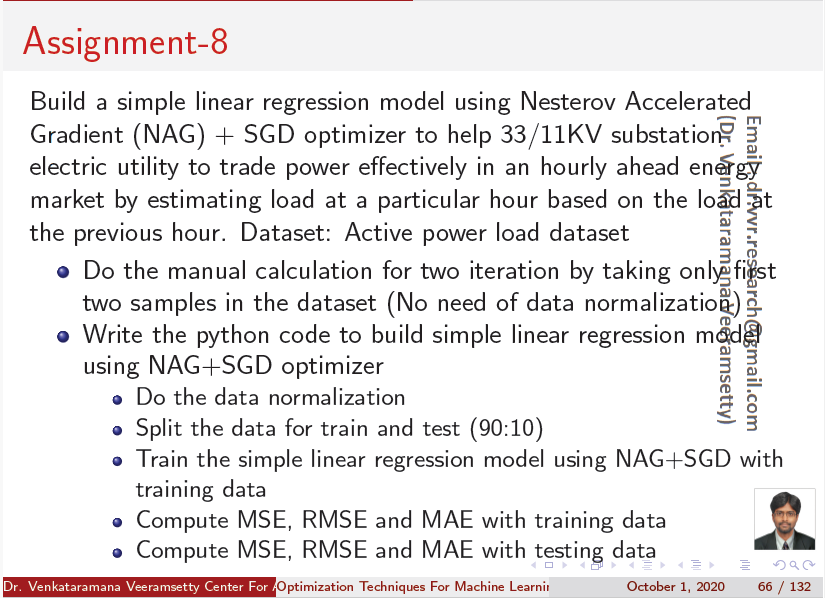

**Import Libraries**

In [1]:
import numpy as np
import math as mt
import random
import pandas as pd

**Load Data**

In [2]:
data = pd.read_csv('/content/Dataset-NAG-Assignment.csv')
data.head()

,L(T-1),L(T)
0,5551.82208,4983.17184
1,4983.17184,4888.39680
2,4888.39680,5072.95872
3,5072.95872,5196.25980
4,5196.25980,5641.29720


**Min - Max Values**

In [3]:
IP_min=data['L(T-1)'].min()
IP_max=data['L(T-1)'].max()
OP_min=data['L(T)'].min()
OP_max=data['L(T)'].max()

**Data Normalization**

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data_norm=scaler.transform(data)
data_norm

array([[0.39787738, 0.29380046],
       [0.29380046, 0.27645431],
       [0.27645431, 0.31023366],
       ...,
       [0.21779692, 0.24629825],
       [0.24629825, 0.32438447],
       [0.32438447, 0.65165045]])

**Covert 2D array Into Dataframe**

In [5]:
import pandas as pd
data_norm=pd.DataFrame(data_norm,columns=['IP','OP'])
data_norm.head()

,IP,OP
0,0.397877,0.293800
1,0.293800,0.276454
2,0.276454,0.310234
3,0.310234,0.332801
4,0.332801,0.414254


**Data Split**

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_norm.IP, data_norm.OP, test_size = 0.10, random_state = 10)

**Model Parameters Initialization**

In [7]:
m = random.uniform(-10,10) #Initial value of slope
c = random.uniform(-10,10) #Initial value of intercept
eta = 0.01 #Learning Rate
v_m = 0
v_c = 0
gama = 0.9
max_iter = 100 #Maximum number of iterations

**Gradient Computation**

In [8]:
def deriv(m_f, c_f, x, y,v_m,v_c):
  m_deriv = -1*(y-m_f*x-gama*v_m*x-c_f-gama*v_c)*x
  c_deriv = -1*(y-m_f*x-gama*v_m*x-c_f-gama*v_c)
  return m_deriv, c_deriv

**Model Training**

In [ ]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m,del_c=deriv(m, c, x_train.iloc[sample], y_train.iloc[sample],v_m,v_c)
    v_m = gama * v_m - eta * del_m
    v_c = gama * v_c - eta * del_c
    m += v_m
    c += v_c

  print(f"Iteration: {iter}\tValue of m: {m}, \tValue of c: {c}")

print(f"\nThe local minima occurs at: {m}, {c}")

**Training MSE**

In [10]:
q2=len(x_train)
error=0;
for j in range(q2):
    n2=m*x_train.iloc[j]+c
    error=error+(y_train.iloc[j]-n2)**2
error=error/q2
error

0.01486121488918045

**Testing MSE**

In [11]:
q1=len(x_test)
error=0;
for j in range(q1):
    n2=m*x_test.iloc[j]+c
    error=error+(y_test.iloc[j]-n2)**2
error=error/q2
error

0.0015842632270984844

**Model Deplyment**

In [12]:
X=input('enter value of load one hour before')
print('X=',X)
X_norm=(float(X)-IP_min)/(IP_max-IP_min)
print('X_norm=',X_norm)
Y_norm=m*float(X_norm)+c
Y=Y_norm*(OP_max-OP_min)+OP_min
print('Weight of nitrogen=',Y)

enter value of load one hour before5000
X= 5000
X_norm= 0.29688042747666915
Weight of nitrogen= 5240.007183400059


# **Thank You**